# 03. Model VGG - Initial

### Importando as bibliotecas

In [1]:
import sys
import os
from pathlib import Path
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import params.consts as consts
from IPython.display import Image, display

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [2]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset

In [3]:
df = keras.datasets.cifar10 # Armazenando o dataset em uma variável

In [4]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

In [5]:
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
] # Definindo uma legenda para as classes

### Definindo o modelo Keras a partir de um pipeline

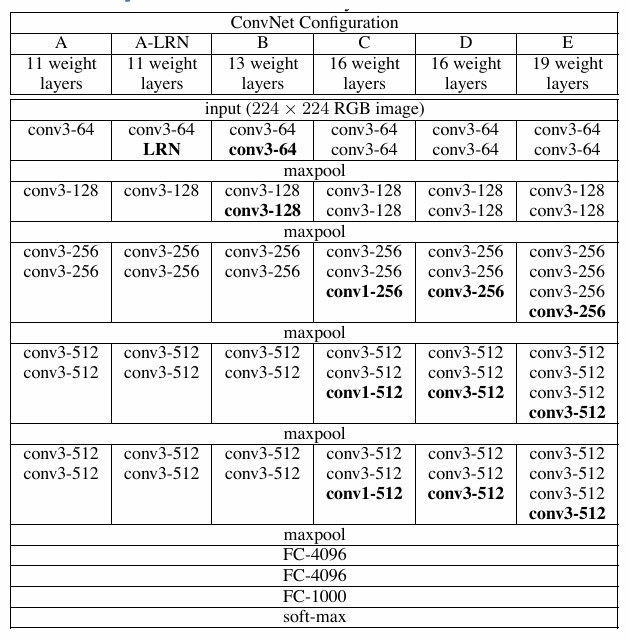

In [6]:
display(Image(consts.VGG)) # Exibindo a referência VGG

In [7]:
# Etapa inicial
model = keras.models.Sequential() # Instanciando o modelo

# Etapas de pré processamento
model.add(keras.layers.InputLayer(input_shape=(32, 32, 3))) # Passando o shape dos dados para o modelo
model.add(keras.layers.Rescaling(scale=1./255)) # Fazendo o rescaling dos dados entre 0 e 255 para 0 e 1

# Etapas de data augmentation
model.add(keras.layers.RandomRotation(0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso rotação da imagem
model.add(keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso translação da imagem
model.add(keras.layers.RandomZoom(0.1)) # Aplicando o Data Augmentation para aumento dos dados, nesse caso zoom na imagem
model.add(keras.layers.RandomFlip('horizontal')) # Aplicando o Data Augmentation para aumento dos dados, nesse caso flip na imagem somente na horizontal, pois o modelo não está sendo treinando com imagens de cabeça para baixo

# Etapas de CNN (Usando como base conceitos de Image....., adaptado para um modelo menos complexo)
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(128, (1, 1), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(256, (1, 1), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.Conv2D(256, (1, 1), activation='relu', padding='same')) # Adicionando uma camada convolucional
model.add(keras.layers.MaxPooling2D()) # Adicionando o Max Pooling visando desconsiderar o fundo da imagem

# Etapas de camadas ocultas
model.add(keras.layers.Flatten()) # Realizando a redução de dimensionalidade/achatamento
model.add(keras.layers.Dense(512, activation='relu')) # Passando a camada de sáida
model.add(keras.layers.Dropout(0.5)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Dense(512, activation='relu')) # Passando a camada de sáida
model.add(keras.layers.Dropout(0.5)) # Desligando alguns neurônios aleatóriamente para tentar reduzir o overfitting
model.add(keras.layers.Dense(10, activation='softmax')) # Passando a camada de sáida (10 = valores de resultados possíveis (0 a 9))

model.summary() # Exibindo o resumo do treinamento

c:\Users\mathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ (None, 32, 32, 3)      │             0 │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 2, 2, 256)      │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             

 Total params: 2,899,882 (11.06 MB)

 Trainable params: 2,899,882 (11.06 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando o modelo

In [8]:
optimizer = keras.optimizers.Adam(learning_rate=1E-4) # Definindo o otimizador
loss = keras.losses.SparseCategoricalCrossentropy() # Definindo a função de busca
metric = keras.metrics.SparseCategoricalAccuracy() # Definindo a métrica a ser considerada durante o treinamento

model.compile(optimizer=optimizer, loss=loss, metrics=[metric]) # Compilando o modelo

### Treinando o modelo

**Obs:** como o tempo de treinamento do modelo estava extremamente alto, tive que fazer alterações: epochs de 300 para 10 e start_from_epoch de 150 para 1

In [9]:
early_stop = keras.callbacks.EarlyStopping( # Configurando um callback que interrompe o treinamento do modelo caso o desempenho pare de melhorar, com base em métricas monitoradas
    patience = 5, # Definindo o patience, que é o número de epochs consecutivas em que a métrica monitorada pode não melhorar antes de interromper o treinamento
    verbose = 1, # Definindo o verbose para exibir a informação de quando o callback for acionado caso aconteça
    min_delta = 1E-4, # Definindo a menor diferença aceitável para considerar que houve melhora em uma métrica monitorada
    start_from_epoch = 1 # Definindo a epoch mínimo em que o early stop será executado
)

history = model.fit( # Treinando o modelo e armazenando o seu resultado em uma variável
    x_train, # Passando os valores de x de treino
    y_train, # Passando os valores de y de treino
    epochs = 10, # Definindo o número máximo de epochs, ou seja, quantas vezes o modelo passará por todo o conjunto de treino durante o ajuste
    batch_size = 256, # Definindo o batch size, que é o número de amostras processadas de uma só vez antes de atualizar os pesos do modelo
    validation_split = 0.2, # Definindo a proporção dos dados de treino que será separada para validação
    callbacks = [early_stop] # Definindo o callback com a condição de parada definida anteriormente para interromper o treinamento do modelo
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 148s 906ms/step - loss: 2.2289 - sparse_categorical_accuracy: 0.1376 - val_loss: 2.0400 - val_sparse_categorical_accuracy: 0.1929
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - loss: 1.9923 - sparse_categorical_accuracy: 0.2212 - val_loss: 1.8099 - val_sparse_categorical_accuracy: 0.3056
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - loss: 1.8759 - sparse_categorical_accuracy: 0.2845 - val_loss: 1.9419 - val_sparse_categorical_accuracy: 0.3001
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - loss: 1.7471 - sparse_categorical_accuracy: 0.3339 - val_loss: 1.7769 - val_sparse_categorical_accuracy: 0.3445
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - loss: 1.6810 - sparse_categorical_accuracy: 0.3619 - val_loss: 1.5938 - val_sparse_categorical_accuracy: 0.4134
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - loss: 1.6190 - sparse_categorical_accuracy: 0.3909 - val_loss: 1.7650 - val_sparse_categorical_accuracy: 0.

### Fazendo o evaluate do modelo

In [10]:
model.evaluate(x_test, y_test) # Fazendo o evaluate do modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - loss: 1.4372 - sparse_categorical_accuracy: 0.4920


[1.4327392578125, 0.49149999022483826]

### Verificando possíveis condições de overfitting

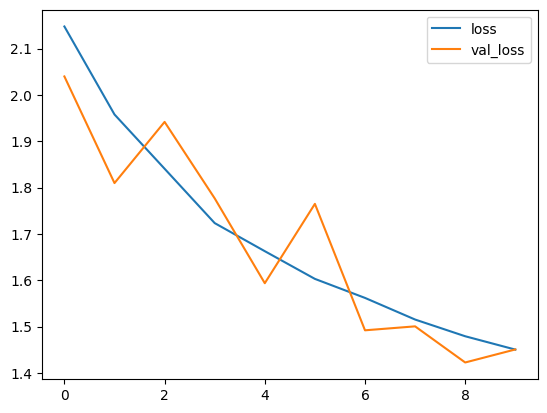

In [11]:
plt.plot(history.history['loss'], label='loss') # Plotando os valores de treino
plt.plot(history.history['val_loss'], label='val_loss') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

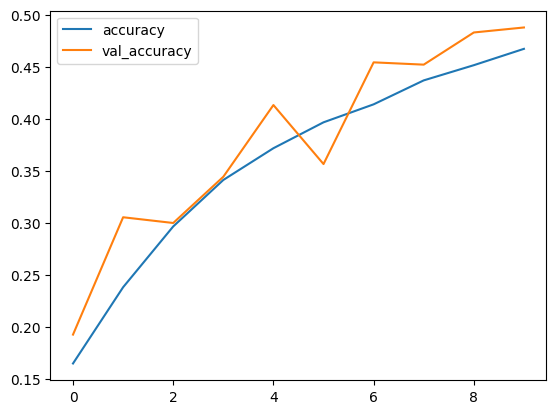

In [12]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy') # Plotando os valores de treino
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy') # Plotando os valores de validação
plt.legend() # Exibindo as legendas
plt.show() # Exibindo o gráfico

Nesse cenário, após a aplicação do pré processamento de Data Augmentation, os índicios de overfitting não aparecem mais, deixando assim o modelo pronto para ser utilizado com os dados reais.

### Fazendo o predict do modelo com uma amostra dos dados

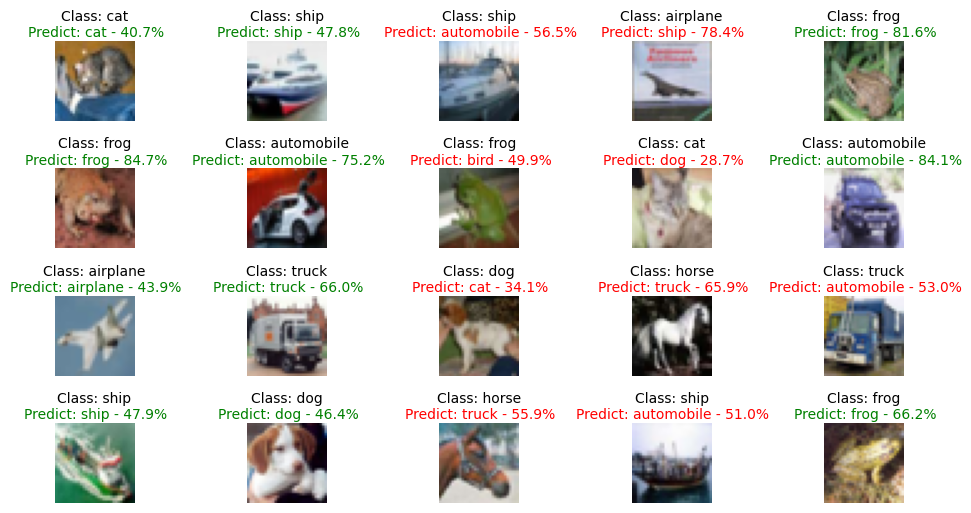

In [13]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_test[i]) # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Class: {class_names[y_test[i][0]]}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        16, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Predict: {class_names[pred.argmax()]} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == y_test[i] else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Testando o modelo em imagens criadas manualmente

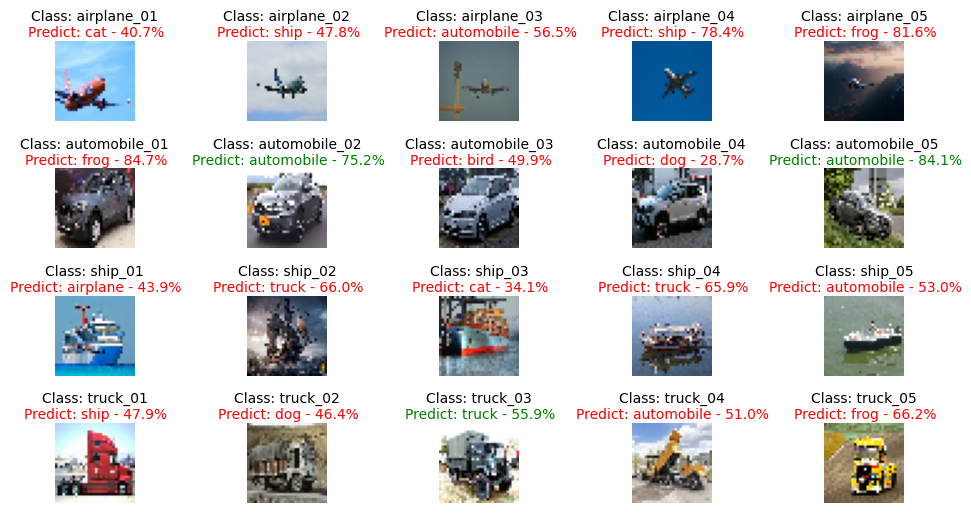

In [14]:
real_images_dir = Path('../images/real_images') # Armazenando em uma variável o caminho da pasta das imagens criadas manualmente

all_pred = {} # Criando um dicionário vazio para armazenar as previsões do modelo e poder verificar as probabilidades de cada resultado posteriormente

fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, (img, ax) in enumerate(zip(sorted(real_images_dir.glob('*.jpg')), axs.flat)): # Criando uma estrutura de repetição para percorrer as imagens criadas e plotar em um gráfico
    
    name = img.name.split('.')[0] # Armazenando em uma variável o nome da imagem com o número correto a partir do . como separador

    img = keras.preprocessing.image.load_img(
        img, target_size=(32, 32), color_mode='rgb', keep_aspect_ratio=False
    ) # Ajustando a escala da imagem, pois o modelo foi treinado com imagens com 28 x 28 pixels, e as que fizemos possuem 128 x 128
    img_array = keras.preprocessing.image.img_to_array(img, dtype=np.uint8) # Convertendo a imagem para um array NumPy
    img_array = tf.expand_dims(img_array, 0) # Adicionando uma dimensão extra

    pred = model.predict(img_array, verbose=0) # Armazenando o valor previsto em uma variável
    all_pred[name] = pred # Adicionando a previsão no dicionário criado anteriormente para isso
    
    ax.imshow(img_array[0]) # Plotando a imagem em um gráfico em escala de cinza
    ax.set_title(f'Class: {name}', size=10, pad=15) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0] # Armazenando a previsão do modelo em uma variável
    ax.text( # Adicionando um texto com a previsão do modelo
        16, # Definindo a posição horizontal
        -4, # Definindo a posição vertical
        f'Predict: {class_names[pred.argmax()]} - {pred.max():.1%}', # Definindo o conteúdo do texto
        color='green' if pred.argmax() == class_names.index(name.split('_')[0]) else 'red', # Definindo a cor do texto, variando de acordo com a previsão certa ou errada
        verticalalignment = 'center', # Definindo o alinhamento vertical
        horizontalalignment = 'center', # Definindo o alinhamento horizontal
    )

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos

### Verificando as probabilidades de resultados para cada imagem

In [15]:
formatted_pred = { # Criando um dicionário para formatar os valores 
    key: np.array([['{:.1f}%'.format(x * 100) for x in row] for row in value]) 
    for key, value in all_pred.items()
}

for key, value in formatted_pred.items(): # Criando uma estrutura de repetição para printar os resultados de chave e valor das previsões
    print(f'{key}: {value}')

airplane_01: [['21.3%' '0.4%' '0.3%' '0.0%' '0.1%' '0.0%' '0.0%' '0.0%' '77.7%' '0.2%']]
airplane_02: [['83.8%' '0.0%' '1.3%' '0.0%' '0.2%' '0.0%' '0.0%' '0.0%' '14.6%' '0.1%']]
airplane_03: [['63.0%' '0.2%' '5.2%' '0.2%' '1.1%' '0.1%' '0.1%' '0.1%' '29.7%' '0.3%']]
airplane_04: [['82.9%' '0.1%' '6.1%' '0.2%' '0.7%' '0.1%' '0.0%' '0.1%' '9.8%' '0.1%']]
airplane_05: [['8.1%' '26.7%' '1.1%' '0.7%' '0.3%' '0.4%' '0.4%' '0.2%' '57.1%' '5.1%']]
automobile_01: [['0.2%' '80.2%' '0.0%' '0.1%' '0.0%' '0.0%' '0.1%' '0.0%' '0.3%' '19.1%']]
automobile_02: [['0.0%' '84.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.1%' '15.9%']]
automobile_03: [['0.0%' '94.3%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.1%' '5.6%']]
automobile_04: [['0.1%' '88.2%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.4%' '11.2%']]
automobile_05: [['0.1%' '81.5%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.0%' '0.2%' '18.1%']]
ship_01: [['22.4%' '0.7%' '0.7%' '0.1%' '0.1%' '0.0%' '0.0%' '0.0%' '75.8%' '0.2%']]
ship_02: [['0.7%'